In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols

In [16]:
df = pd.read_excel('exp1results.xlsx')
df2 = df.rename({'Likeability': 'Response'}, axis=1, inplace =True)  
df.head()

,TemptingFate,CognitiveLoad,Gender,AgeRange,EducationalLevel,Country,Response,Ending number,SelfReportedEffort
0,no,no,woman,18-20,High school education,Spain,5.0,NaN,NaN
1,no,no,man,18-20,High school education,Spain,4.0,NaN,NaN
2,no,no,woman,20-25,Bachelor's degree,Spain,9.0,NaN,NaN
3,no,no,woman,20-25,Bachelor's degree,Spain,3.0,NaN,NaN
4,no,no,woman,20-25,Bachelor's degree,Spain,3.0,NaN,NaN


In [17]:
len(df)

36

In [18]:
df['TemptingFate'].replace({'yes': 'Tempting Fate', 'no': 'Not Tempting Fate'}, inplace=True)
df['CognitiveLoad'].replace({'yes': 'Cognitive Load', 'no': 'No Load'}, inplace=True)
df.head()

,TemptingFate,CognitiveLoad,Gender,AgeRange,EducationalLevel,Country,Response,Ending number,SelfReportedEffort
0,Not Tempting Fate,No Load,woman,18-20,High school education,Spain,5.0,NaN,NaN
1,Not Tempting Fate,No Load,man,18-20,High school education,Spain,4.0,NaN,NaN
2,Not Tempting Fate,No Load,woman,20-25,Bachelor's degree,Spain,9.0,NaN,NaN
3,Not Tempting Fate,No Load,woman,20-25,Bachelor's degree,Spain,3.0,NaN,NaN
4,Not Tempting Fate,No Load,woman,20-25,Bachelor's degree,Spain,3.0,NaN,NaN


In [19]:
len(df)

36

In [20]:
import scipy.stats as stats

def test(tf, cl):
  x = df[(df['TemptingFate'] == tf) & (df['CognitiveLoad'] == cl)]['Response'].values
  print(len(x))
  sns.histplot(x, bins=10)
  print(stats.normaltest(x))

9
NormaltestResult(statistic=3.7586583608804887, pvalue=0.1526925005248176)


C:\Users\vaorc\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


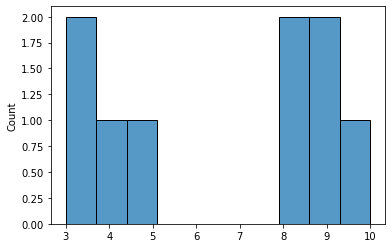

In [21]:
test('Not Tempting Fate', 'No Load')

9
NormaltestResult(statistic=1.2048723404825887, pvalue=0.547476264774477)


C:\Users\vaorc\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


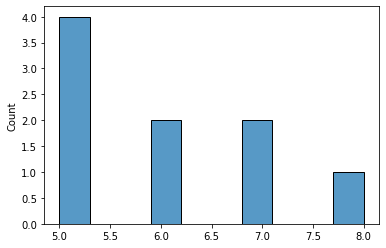

In [22]:
test('Not Tempting Fate', 'Cognitive Load')

9
NormaltestResult(statistic=2.2869672369277048, pvalue=0.3187068327128179)


C:\Users\vaorc\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


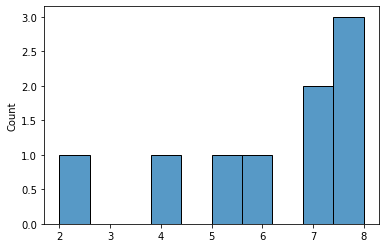

In [23]:
test('Tempting Fate', 'No Load')

9
NormaltestResult(statistic=4.641654424193439, pvalue=0.09819232611960964)


C:\Users\vaorc\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


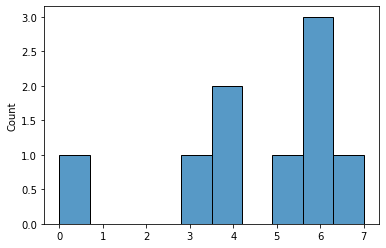

In [24]:
test('Tempting Fate', 'Cognitive Load')

In [25]:
model = ols('Response ~ C(CognitiveLoad) + C(TemptingFate) + C(CognitiveLoad) : C(TemptingFate)', data=df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
C(CognitiveLoad),10.027778,1.0,2.238760,0.144388
C(TemptingFate),8.027778,1.0,1.792248,0.190086
C(CognitiveLoad):C(TemptingFate),2.250000,1.0,0.502326,0.483612
Residual,143.333333,32.0,NaN,NaN


Text(0, 0.5, 'Likelihood Judgements')

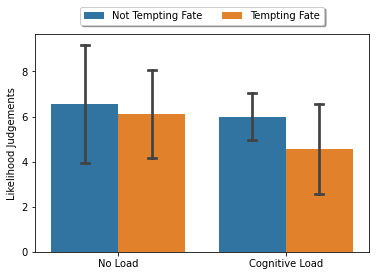

In [26]:
sns.barplot(x='CognitiveLoad', y='Response', hue='TemptingFate', data=df, capsize=.05, ci='sd')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=5)
plt.xlabel('')
plt.ylabel('Likelihood Judgements')

In [27]:
cl_tf = df[(df['CognitiveLoad'] == 'Cognitive Load') & (df['TemptingFate'] == 'Tempting Fate')]
cl_ntf = df[(df['CognitiveLoad'] == 'Cognitive Load') & (df['TemptingFate'] == 'Not Tempting Fate')]
stats.ttest_ind(cl_ntf['Response'], cl_tf['Response'])

Ttest_indResult(statistic=1.802775637731995, pvalue=0.0902894607270621)

In [28]:
cl_tf = df[(df['CognitiveLoad'] == 'No Load') & (df['TemptingFate'] == 'Tempting Fate')]
cl_ntf = df[(df['CognitiveLoad'] == 'No Load') & (df['TemptingFate'] == 'Not Tempting Fate')]
stats.ttest_ind(cl_ntf['Response'], cl_tf['Response'])

Ttest_indResult(statistic=0.38269189858795205, pvalue=0.7069843191529694)